In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Question 2(b) Write up a general purpose simulator for the state transition matrix

In [2]:
def simulator(days):
    states = ['sunny','cloudy','rainy']
    transition_matrix = np.array([[0.8, 0.2, 0],[0.4,0.4,0.2],[0.2, 0.6, 0.2]])
    today = np.random.choice(states)
    current_state = today
    weather_sequence = [current_state]
    for _ in range(days - 1):
        current_state = np.random.choice(states,p=transition_matrix[states.index(current_state)])
        weather_sequence.append(current_state)
    return weather_sequence

In [3]:
print(simulator(10))

['sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'sunny', 'sunny', 'sunny', 'cloudy']


For Question 2(b),Random walk was performed. The simulator is created using np.random.choice function with it's parameter to be transition matrix given in the question. 
The steps taken are:
-> generate a random weather to start the simulator by using the given states (i.e. ['sunny','cloudy','rainy'])
-> new value is generated using the current value and transition matrix given to us.
-> new value is added to the list.

# Question 2(c) Use your simulator to determine the stationary distribution of this Markov chain. In particular I would like everyone to address 
(i) How you initialize the simulation 
(ii) How many transitions you consider before taking a result and 
(iii) How many simulation runs you conducted to arrive at the statistics for the stationary distribution.

In [4]:
def stationary_distribution(days):
   states = ['sunny','cloudy','rainy']
   transition_matrix = np.array([[0.8, 0.2, 0],[0.4,0.4,0.2],[0.2, 0.6, 0.2]])
   today = np.random.choice(states)
   pi = np.array([0,0,0])
   final_distribution = np.array([0,0,0])
   weather_sequence = [today]
   for i in range(days):
      pi[states.index(today)] += 1
      today = np.random.choice(states,p=transition_matrix[states.index(today)])
      weather_sequence.append(today)
   final_distribution = pi/np.sum(pi)
   return final_distribution, weather_sequence
        

In [5]:
states=['sunny','cloudy','rainy']

<BarContainer object of 3 artists>

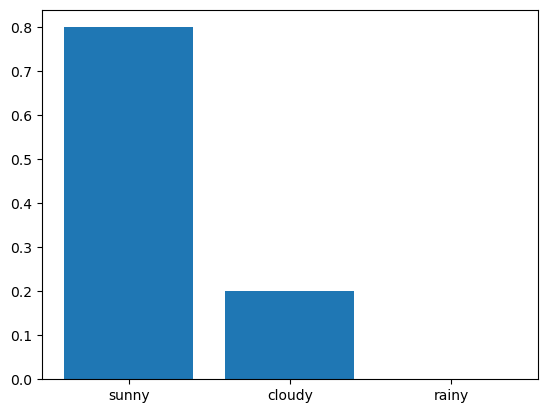

In [6]:
dist1, seq1 = stationary_distribution(10)
plt.bar(states, dist1)

<BarContainer object of 3 artists>

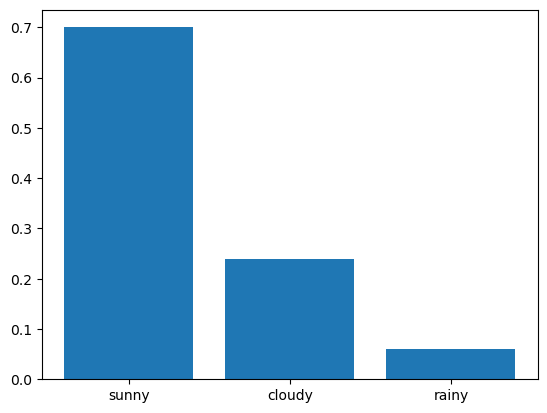

In [7]:
dist2, seq2 = stationary_distribution(100)
plt.bar(states, dist2)

<BarContainer object of 3 artists>

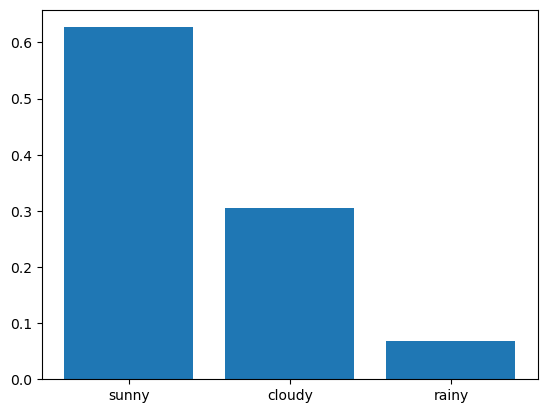

In [8]:
dist3, seq3 = stationary_distribution(1000)
plt.bar(states, dist3)

<BarContainer object of 3 artists>

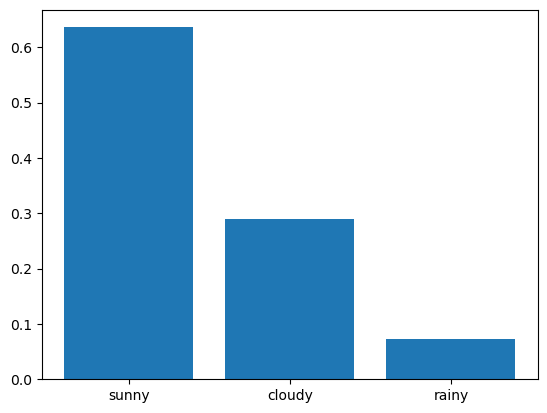

In [9]:
dist4, seq4 = stationary_distribution(10000)
plt.bar(states, dist4)

<BarContainer object of 3 artists>

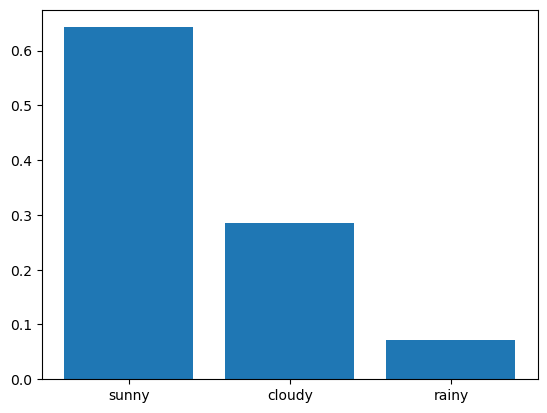

In [10]:
dist5, seq5 = stationary_distribution(16000)
plt.bar(states, dist5)

<BarContainer object of 3 artists>

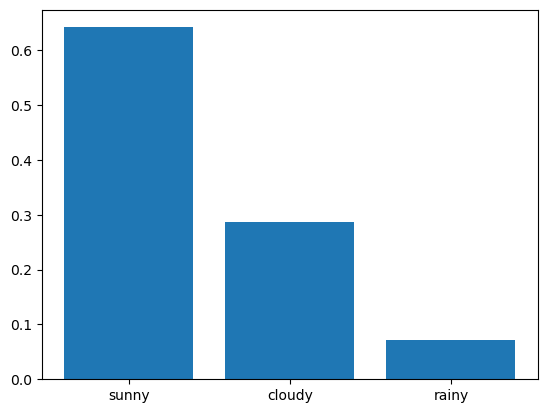

In [11]:
dist6, seq6 = stationary_distribution(100000)
plt.bar(states, dist6)

The simulation starts with a randomly chosen weather state for today. It runs for a specified number of days (days).For each day, the current state's count is incremented, and the next state is chosen based on the probabilities in the transition matrix.
Output:- The function returns the final stationary distribution (final_distribution), which is the normalized count of each state occurrence. It also returns the sequence of weather states over the days (weather_sequence).

In [12]:
def plotting_stationary_distribution(days):
    states = ['sunny','cloudy','rainy']
    transition_matrix = np.array([[0.8, 0.2, 0],[0.4,0.4,0.2],[0.2, 0.6, 0.2]])
   
    today = np.random.choice(states)
    pi = np.array([0,0,0])
    final_distribution = np.zeros((days, 3))
    weather_sequence = [today]
    for i in range(days):
        pi[states.index(today)] += 1
        today = np.random.choice(states,p=transition_matrix[states.index(today)])
        weather_sequence.append(today)
        final_distribution[i,:] = pi/np.sum(pi)
    
    plt.figure(figsize=(10,6))
    plt.plot(final_distribution[:,0], label='Sunny')
    plt.plot(final_distribution[:,1], label='Cloudy')
    plt.plot(final_distribution[:,2], label='Rainy')
    plt.xlabel('Days')
    plt.ylabel('Stationary Distribution of Weathers')
    plt.legend()
    plt.title('Stationary Distribution Plot Over The Time Period Given')
    plt.show()
    return final_distribution

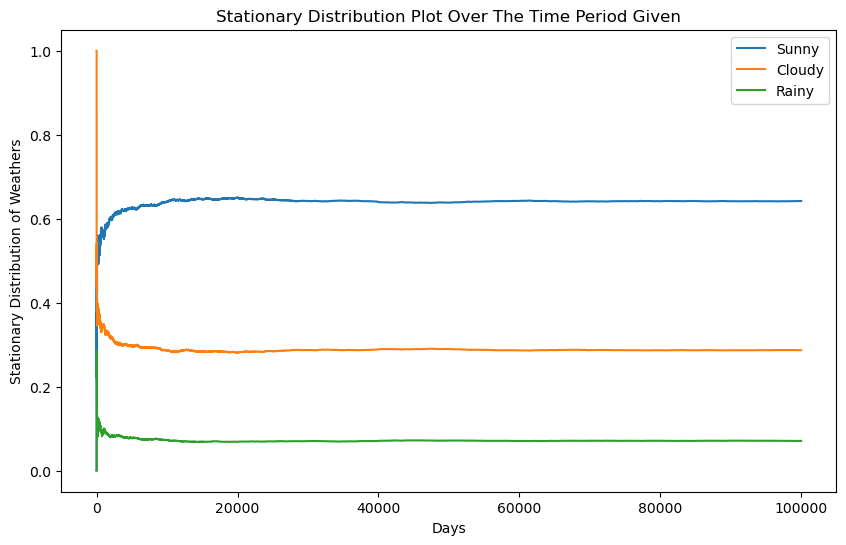

In [13]:
dist = plotting_stationary_distribution(100000)

In [14]:
#Average stationary distribution of the seqence above
print('Average distribution of Sunny Days: '+str(np.mean(dist[:,0])))
print('Average distribution of Cloudy Days: '+str(np.mean(dist[:,1])))
print('Average distribution of Rainy Days: '+str(np.mean(dist[:,2])))

Average distribution of Sunny Days: 0.6391892119663629
Average distribution of Cloudy Days: 0.2889217262796341
Average distribution of Rainy Days: 0.07188906175400302


Answering the above questions, 

(i) How you initialize the simulation

The simulation starts with a randomly chosen weather state (today) using np.random.choice(states). The initial state probabilities (pi) are set to zero for all states.

(ii) How many transitions you consider before taking a result

The 7th Graph shows the distribution of 100000 runs. We can see that the graph converges over the period of time i.e. it starts to become narrowly distributed as the number of days increase, therefore, if we take the average of the stationary distributions over days we arrive at the values similar to that of the reference provided to us.

(iii) How many simulation runs you conducted to arrive at the statistics for the stationary distribution

The simulation was run on 6 different transitions, namely for, 10, 100, 1000, 10000 and 100000. The stationary distribution for these simulations are presented in the form of bar plots above. 

# Question 2(d):The solution is derived via a closed analytical form. Can you do the diagonalization of the state matrix A with python to come up with the same result.

The stationary distribution of a Markov chain should not change when a transition matrix is applied to it (i.e. pi = P * pi), which is similar to that of the form lambda * v = A * v, where the eigen value lambda is 1. Transpose of the above formula is considered. How we proceed to diagonalize is by first transposing the transition matrix and finding the eigen values and eigen vectors. After which, we normalize the eigen vector corresponding to eigen value 1. Using the eigen vectors we got, we find it's inverse. Using the eigen vectors, it's inverse and the transpose of the transpose matrix we solve for diagonal matrix.

In [15]:
def diagonalization(P):
    P_transpose = np.matrix.transpose(P) #Taking transpose of transition matrix
    (eigen_val, eigen_vec) = np.linalg.eig(P_transpose)
    eigvec = np.matrix.transpose(eigen_vec)[0]
    eigvec = np.divide(eigvec, np.sum(eigvec))
    print('Normalized Eigen vector of the having eigenvalue 1: '+str(eigvec))
    eigen_vec_inv = np.linalg.inv(eigen_vec)
    diag_matrix = eigen_vec_inv @ P_transpose @ eigen_vec
    scaled_down_diag_matrix = np.round(diag_matrix, decimals = 10)
    print('Diagonal Matrix: \n'+str(scaled_down_diag_matrix))
    return eigen_vec, eigen_vec_inv, scaled_down_diag_matrix

In [16]:
transition_matrix = np.array([[0.8, 0.2, 0],[0.4,0.4,0.2],[0.2, 0.6, 0.2]])
eigen_vec, eigen_vec_inv, diag_matrix = diagonalization(transition_matrix)

Normalized Eigen vector of the having eigenvalue 1: [0.64285714 0.28571429 0.07142857]
Diagonal Matrix: 
[[ 1.          0.          0.        ]
 [ 0.          0.48284271 -0.        ]
 [-0.          0.         -0.08284271]]


In [17]:
#Given solution
sol = [9/14, 2/7, 1/14]
print('Given Solution from Reference: ',sol)

Given Solution from Reference:  [0.6428571428571429, 0.2857142857142857, 0.07142857142857142]


As you can see the Normalized values of the Eigen vector of the maximum lambda are close to that of the reference solution.

In [18]:
D = np.diag(diag_matrix)# take the diagonal of the diagonal matrix

Taking same number of iterations as the simulation. We find the diagonal matrix of the N-th iteration which is then used to verify whether we get the same transition matrix used.

In [19]:
N = 100000#number of iterations
D_n = np.diag(D)**N #find diagonal matrix for N iterations
print('D ^ 100000: \n'+str(D_n))

D ^ 100000: 
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


To check if P * D * P_inv will give you the transition matrix

In [20]:
trans_matrix = eigen_vec @ diag_matrix @ eigen_vec_inv
trans_matrix = np.round(trans_matrix,decimals=4)

The result was therefore verified.